Lecture: AI I - Basics 

Previous:
[**Chapter 4.3: Evaluation with scikit-learn**](../03_evaluation.ipynb)

---

# Exercise 4.3: Evaluation with scikit-learn

- [Task 1 - Random Forest Training](#task-1-random-forest-training)
- [Task 2 - Grid Search Optimization](#task-2-grid-search-optimization)
- [Task 3 - Confusion Matrix and Classification Report](#task-3-confusion-matrix-and-classification-report)

> Hint: When doing the exercises put your solution in the designated "Solution" section:
> ```python
> # Solution (put your code here)
> ```

## Task 1: Random Forest Training

Train a Random Forest classifier on the Wine dataset and evaluate its performance using cross-validation. Also, store the results of cross-validation in a variable named `cv_scores`.


In [11]:
# Prerequisites for Task 1
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score

# Load Wine dataset and split into training and test sets
wine = datasets.load_wine()
X_wine, y_wine = wine.data, wine.target
X_train, X_test, y_train, y_test = train_test_split(
    X_wine, y_wine, test_size=0.3, random_state=42
)

In [ ]:
# Solution (put your code here)


✓ Task 1 Complete - RF Test Accuracy: 1.000, CV Mean: 0.967 ± 0.021


/tmp/ipykernel_29261/1477224041.py:38: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


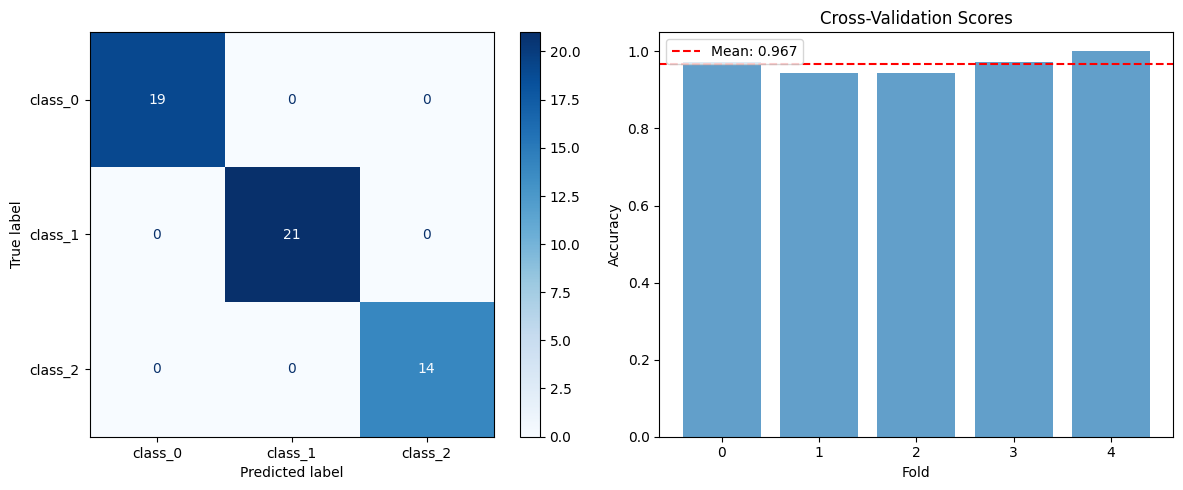

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Make predictions and evaluate
y_pred = rf_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

# Test assertions
assert test_accuracy > 0.90, f"Random Forest should achieve >90% accuracy, got {test_accuracy:.3f}"
assert cv_scores.mean() > 0.90, f"CV mean should be >90%, got {cv_scores.mean():.3f}"

# Visualize results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
_ = ConfusionMatrixDisplay.from_estimator(
    rf_model, 
    X_test, 
    y_test, 
    display_labels=wine.target_names, 
    cmap=plt.cm.Blues,
    ax=ax1
)

# Cross-validation scores
ax2.bar(range(len(cv_scores)), cv_scores, alpha=0.7)
ax2.axhline(y=cv_scores.mean(), color='red', linestyle='--', label=f'Mean: {cv_scores.mean():.3f}')
ax2.set_title('Cross-Validation Scores')
ax2.set_xlabel('Fold')
ax2.set_ylabel('Accuracy')
ax2.legend()

fig.tight_layout()
fig.show()

print(f"✓ Task 1 Complete - RF Test Accuracy: {test_accuracy:.3f}, CV Mean: {cv_scores.mean():.3f} ± {cv_scores.std():.3f}")

## Task 2 - Grid Search Optimization

Perform grid search to find optimal hyperparameters for the Random Forest model.

test the following hyperparameters:
- `n_estimators`: [50, 100, 200]
- `max_depth`: [3, 5, 10, None]
- `min_samples_split`: [2, 5, 10]

Use 5-fold cross-validation during grid search and report the best hyperparameters found. 
As metric use accuracy. Store the best model in a variable named `best_model`.

In [ ]:
## Prerequisites for Task 2
from sklearn.model_selection import GridSearchCV

In [ ]:
# Solution (put your code here)


,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'max_depth': [3, 5, ...], 'min_samples_split': [2, 5, ...], 'n_estimators': [50, 100, ...]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,50


In [25]:
# Test and Visualization
import pandas as pd

best_predictions = best_model.predict(X_test)
best_accuracy = accuracy_score(y_test, best_predictions)

# Test assertions
assert grid_search.best_score_ > 0.90, f"Best CV score should be >90%, got {grid_search.best_score_:.3f}"
assert best_accuracy > 0.90, f"Best model test accuracy should be >90%, got {best_accuracy:.3f}"

# Visualize grid search results
results_df = pd.DataFrame(grid_search.cv_results_)
pivot_table = results_df.pivot_table(
    values='mean_test_score', 
    index='param_n_estimators', 
    columns='param_max_depth',
    aggfunc='max'
)

print(f"✓ Task 2 Complete - Best CV Score: {grid_search.best_score_:.3f}, Test Accuracy: {best_accuracy:.3f}")
print(f"Best Parameters: {grid_search.best_params_}")

✓ Task 2 Complete - Best CV Score: 0.976, Test Accuracy: 1.000
Best Parameters: {'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 50}


## Task 3 - Confusion Matrix and Classification Report

Create and visualize confusion matrix and detailed classification report for model evaluation.

a) Create a confusion matrix using `ConfusionMatrixDisplay` from scikit-learn and visualize it using matplotlib.

In [34]:
## Prerequisites for Task 3
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

/tmp/ipykernel_29261/4158737314.py:12: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


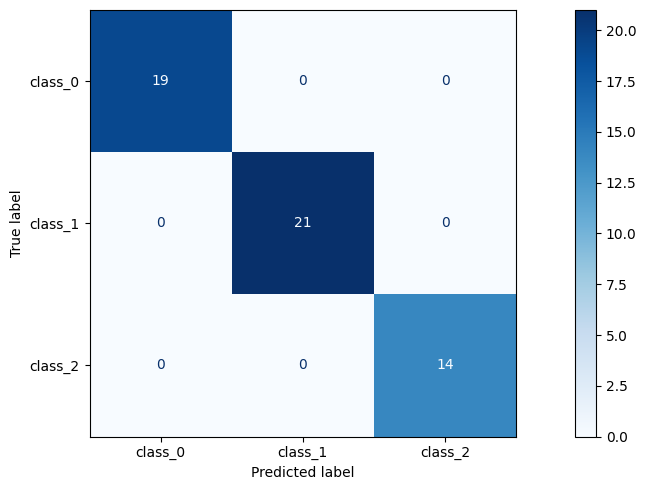

In [ ]:
# Solution (put your code here)


b) Generate a classification report using `classification_report` from scikit-learn and display it in a readable format.

In [ ]:
# Solution (put your code here)
print(classification_report(y_test, best_predictions, target_names=wine.target_names))

              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        19
     class_1       1.00      1.00      1.00        21
     class_2       1.00      1.00      1.00        14

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



---

Lecture: AI I - Basics 

Exercise: [**Exercise 4.3: Evaluation**](../exercises/03_evaluation.ipynb)

Next: [**Chapter 5.1: Assessment 1**](../../05_assessment/01_assessment/README.md)